In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img_prev = cv2.imread('./src/Cup0.Jpg')
img_next = cv2.imread('./src/Cup1.Jpg')

In [3]:
trackingPoint = [[350, 250], [200, 305]]

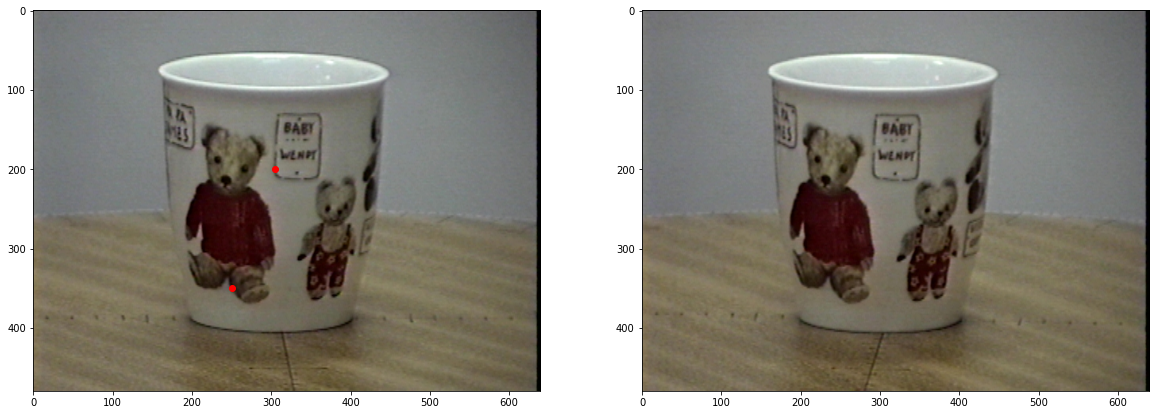

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].imshow(cv2.cvtColor(img_prev, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(img_next, cv2.COLOR_BGR2RGB))

for p in trackingPoint:
    ax[0].plot(p[1], p[0], 'o', color='red')

In [5]:
img_prev_gray = cv2.cvtColor(img_prev, cv2.COLOR_BGR2GRAY)
img_next_gray = cv2.cvtColor(img_next, cv2.COLOR_BGR2GRAY)

In [39]:
p0 = trackingPoint[0]

In [40]:
lk_params = {
    "winSize": (15, 15),
    "maxLevel": 1,
    "criteria": (cv2.TERM_CRITERIA_COUNT, 1, 0),
    'flags': cv2.OPTFLOW_USE_INITIAL_FLOW
}

In [41]:
p0 = np.array(p0)
p0 = np.expand_dims(p0, axis=0)
p0 = np.expand_dims(p0, axis=0)
p0 = p0.astype(np.float32)

In [42]:
iter_points = []
iter_points.append(p0)
for n in range(20):    
    p1, st, err = cv2.calcOpticalFlowPyrLK(img_prev_gray, img_next_gray, iter_points[0].copy(), iter_points[-1].copy(), **lk_params)
    
    iter_points.append(p1)

In [43]:
iter_points = np.array(iter_points, dtype=np.int32)

In [44]:
iter_points = iter_points[:, 0, 0, :]

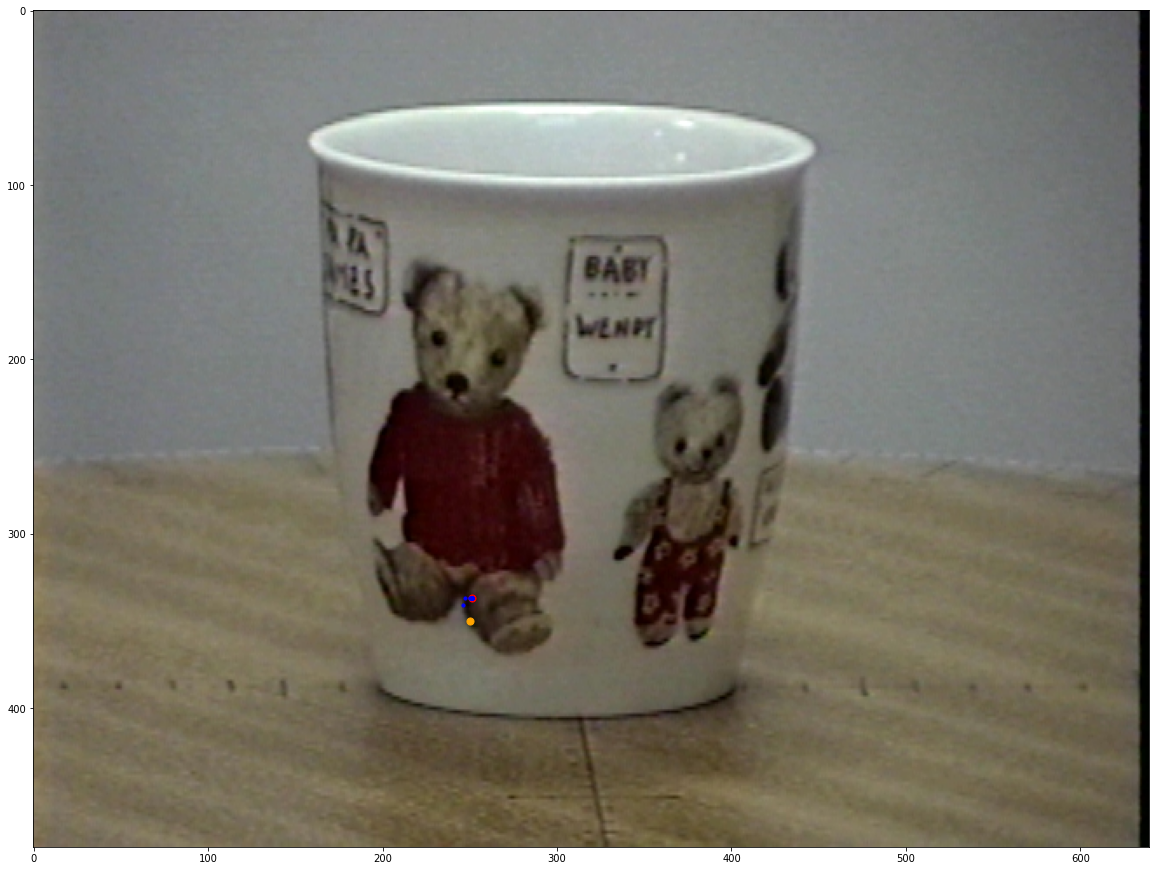

In [45]:
plt.figure(figsize=(20, 20))
plt.imshow(cv2.cvtColor(img_prev, cv2.COLOR_BGR2RGB))
plt.scatter(iter_points[-1, 1], iter_points[-1, 0], c='r', s=50)
plt.scatter(iter_points[1:-1, 1], iter_points[1:-1, 0], c='blue', s=10)
plt.scatter(iter_points[0, 1], iter_points[0, 0], c='orange', s=50)

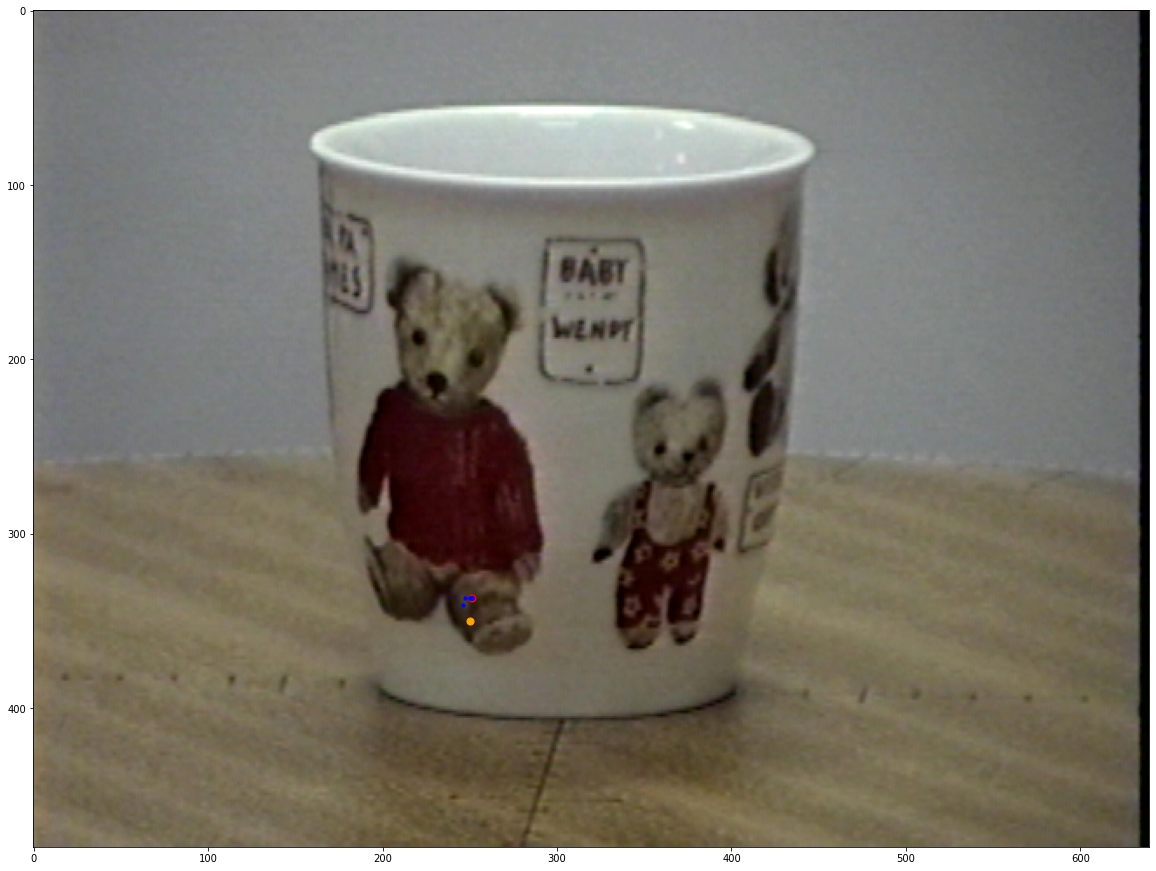

In [46]:
plt.figure(figsize=(20, 20))
plt.imshow(cv2.cvtColor(img_next, cv2.COLOR_BGR2RGB))
plt.scatter(iter_points[-1, 1], iter_points[-1, 0], c='r', s=50)
plt.scatter(iter_points[1:-1, 1], iter_points[1:-1, 0], c='blue', s=10)
plt.scatter(iter_points[0, 1], iter_points[0, 0], c='orange', s=50)